
#### SIMULAÇÃO DOS CONTROLES P E PI NO SISTEMA DISCRETIZADO
**<center>Universidade Federal do Pará</center>**

**Relatório 06**

**Curso:** Engenharia Elétrica

**Disciplina:** Laboratório De Sistemas De Controle

**Docente:** Cleison Daniel Silva

**Discentes:** 

Hilda Beatriz Viana De Oliveira - 201933940028

Ivanildo dos Santos Bento - 201833940019      

Natã Nazareno Brito Barbosa - 201933940016

Cidade: Tucuruí/PA              
    
Turma: 2019



Após análise de cada simulação, a escolha do modelo discreto feita no relatório 05, foi selecionada pelo menor erro médio quadrático e pela melhor resposta apresentados nos gráficos. Esses requisitos foram atendidos pelo sistema de terceira ordem, apresentado logo a baixo:


In [1]:
import control as ct
import numpy as np
from control.matlab import *
import matplotlib.pyplot as plt
from scipy.signal import square

Declarando a função de transferência do modelo discretizado escolhido:

In [2]:
NUM = np.array([-0.003978,  0.01146, 0.02289])      #Numerador
DEN = np.array([ 1, -0.9454,  0.01966, 0.02067])    #Denominador
Ts = 0.02                                           #Amostragem 
Gz = ct.tf(NUM,DEN,Ts)                              #Função de transf.

print('Modelo discretizado: \n',Gz)

Modelo discretizado: 
 
 -0.003978 z^2 + 0.01146 z + 0.02289
--------------------------------------
z^3 - 0.9454 z^2 + 0.01966 z + 0.02067

dt = 0.02



In [3]:

ct.damp(Gz)
ct.zeros(Gz)


_____Eigenvalue______ Damping___ Frequency_
    0.8979                     1    -0.8979
    0.1773                     1    -0.1773
   -0.1298                     1     0.1298


array([ 4.23845096+0.j, -1.35760632+0.j])

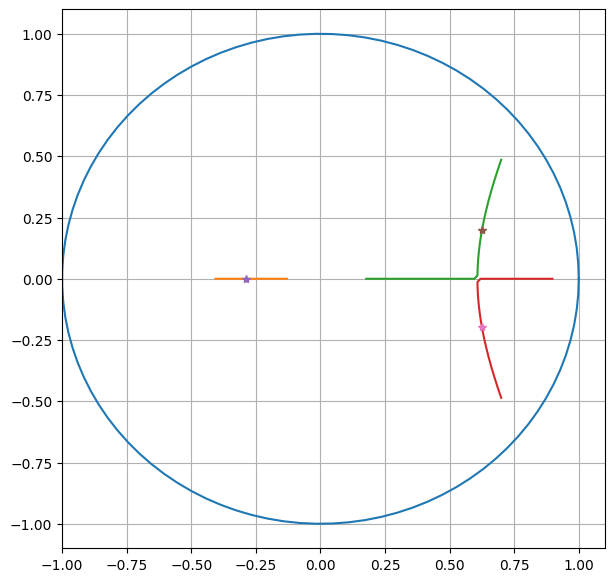

In [4]:
kvect = np.arange(0,12,0.01)
rlist,_ = ct.rlocus(Gz, kvect=kvect, plot = False)

teta = np.linspace(0,2*np.pi,100)
K = 4.5
plt.figure(figsize=(7,7))
plt.plot(np.cos(teta),np.sin(teta))
plt.plot(np.real(rlist[:]),np.imag(rlist[:]))
plt.plot(np.real(rlist[kvect==K]),np.imag(rlist[kvect==K]), '*')
plt.axis([-1,1.1,-1.1,1.1])
plt.grid()
plt.show()

Alguns pontos devem ser levantados quanto a imagem acima, percebe-se que o sistema é estável, ou seja, seus polos estão dentro do círculo.

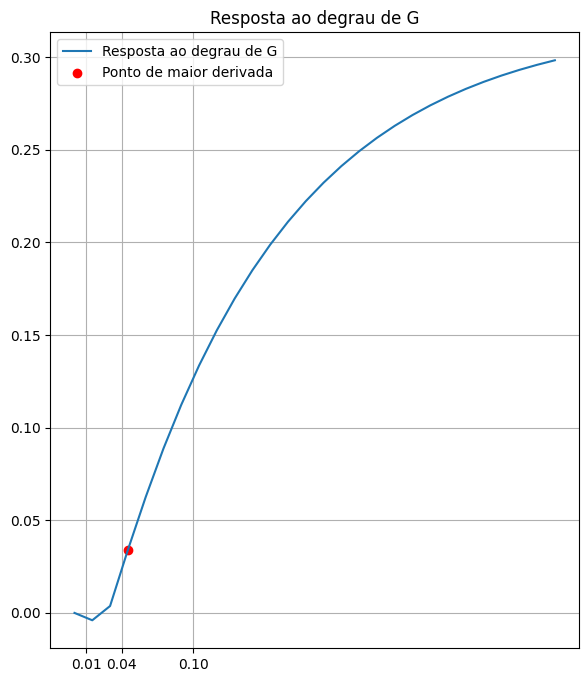

In [5]:
Ts1 = 0.015
G2 = ct.tf(NUM, DEN, Ts1)
T1, yG2 = ct.step_response(G2, T=0.4)

dyG2 = np.gradient(yG2, T1)


max_index = np.argmax(dyG2)

plt.figure(figsize=(15, 8))
plt.subplot(121)
plt.plot(T1, yG2, label='Resposta ao degrau de G')
plt.scatter(T1[max_index], yG2[max_index], color='red', label='Ponto de maior derivada')
plt.xticks([0.01,0.04,0.1])
plt.grid()
plt.title('Resposta ao degrau de G')
plt.legend()
plt.show()


A elaboração dos controladores P e PI foram projetados através do método de Ziegler Nichols.

Para o controlador proporcional, temos a equação abaixo:
$$
\begin{align*}
P =  \frac{T}{L}\\
\end{align*}
$$

onde os valores de T e L são calculados através do gráfico acima.

$$
\begin{align*}
&T = 0.1 - 0.04 = 0.06\\
&L = 0.04
\end{align*}
$$

Assim, temos que o controle proporcional é:
$$
\begin{align*}
P =  \frac{0.06}{0.04} = 1.5\\
\end{align*}
$$


Para o controlador proporcional integral, temos a equação a baixo:
$$
\begin{align*}
PI =  0.9\cdot \frac{T}{L}\\
\end{align*}
$$

Logo:
$$
\begin{align*}
PI =  0.9\cdot \frac{0.06}{0.04} = 1.35\\
 \tau_i=\frac{L}{0.3}= \frac{0.04}{0.3}=0.13
\end{align*}
$$

Em conjunto do método descrito anteriormente, o projeto do controlador PI, foi baseado pela equação abaixo:

$$
\begin{align*}

&G(S) = K_p + \frac{K_i}{S} \\
&= \frac{S \cdot K_p + K_i}{S} \\
&= K_p \cdot \frac{S + \frac{K_i}{K_p}}{S} = \frac{K_c(S+Z)}{S}
\end{align*}
$$
Assim, temos:
$$
\begin{align*}
K_i = \frac{K_p}{\tau_i} = \frac{1.35}{0.13} = 10.38 \\

a = \frac{K_i}{K_p} = \frac{10.38}{1.35} = 7.68

\end{align*}
$$
Sendo que $K_c$ = $K_p$ = $PI$

# Controle P

A seguir, temos uma simulação a resposta ao degrau.

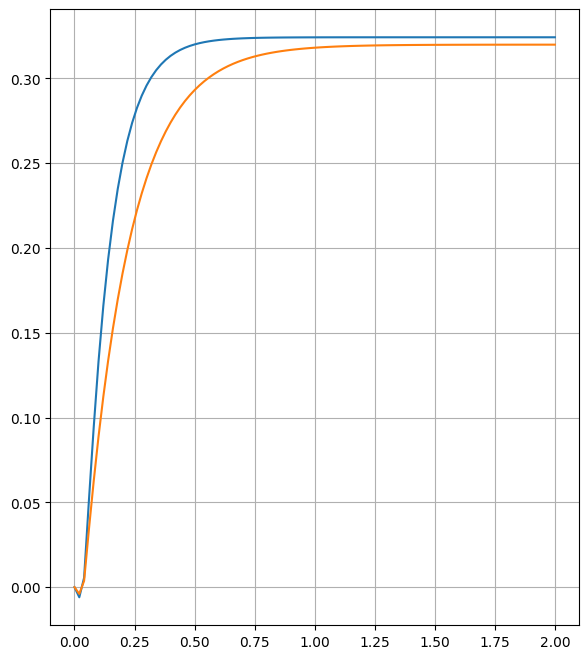

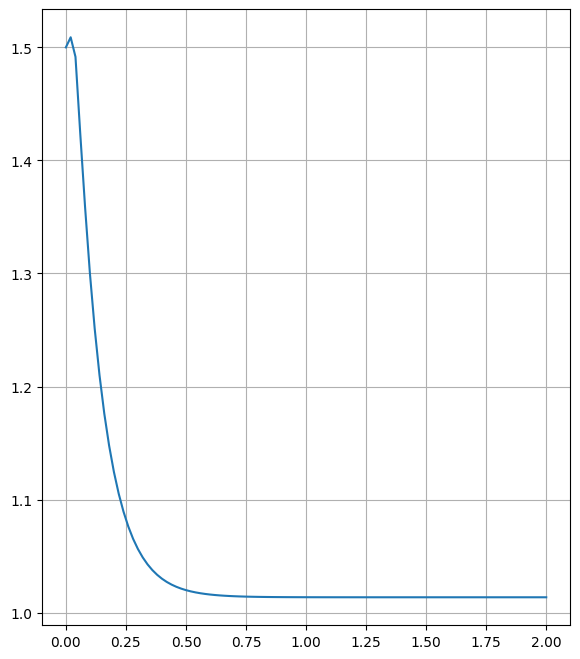

In [6]:
Kp = 1.5                           #Valor de KP

H = ct.feedback(Kp*Gz,1,sign=-1)   #Sistema em maalha fechada
C = ct.feedback(Kp,Gz,sign=-1)     #Controlador

T, yGz = ct.step_response(Gz,T=2)  #resp_degrau em malha aberta
T, yH = ct.step_response(H,T=2)    #resp_degrau em malha fechada
T, yC = ct.step_response(C,T=2)    #controlador

plt.figure(figsize=(15,8))
plt.subplot(121)
plt.plot(T,yH)
plt.plot(T,yGz)
plt.grid()
plt.show()
plt.figure(figsize=(15,8))
plt.subplot(122)
plt.plot(T,yC)
plt.grid()
plt.show()

Além disso, na realização da simulação, temos uma análise feita referente a uma onda quadrada:

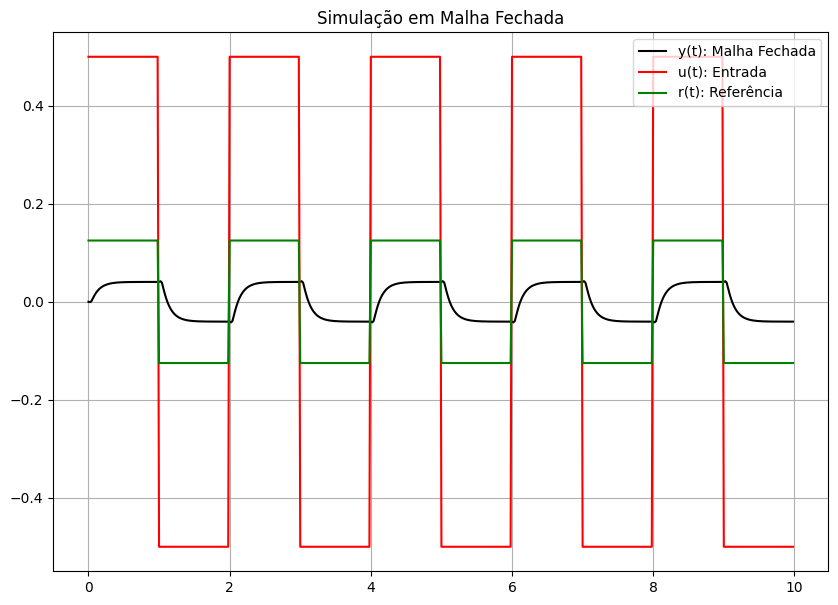

In [7]:
# Define o sinal de entrada e sinal de referência 
N = 500
Amplutude = 0.5
freq = 0.5
Fs = 50
Ts =1/Fs

n = np.arange(0,N)
tempo = n*Ts

sinal_de_entrada = Amplutude*square(2*np.pi*freq*n*Ts)

sinal_de_referencia = 0.25*Amplutude*square(2*np.pi*freq*n*Ts)



# Simulação do Sistema em Malha Fechada para Onda Quadrada 

_, y_malha_fechada = ct.forced_response(H, T = tempo, U = sinal_de_referencia) 

# Simulação do Sistema em Malha Fechada para Onda Quadrada 

plt.figure(figsize=(10,7))
plt.plot(tempo, y_malha_fechada, '-k', label = "y(t): Malha Fechada")
#plt.plot(tempo, , '-b', label ="y(t): Malha aberta")
plt.plot(tempo, sinal_de_entrada, '-r', label ="u(t): Entrada")
plt.plot(tempo, sinal_de_referencia, '-g', label ="r(t): Referência")
plt.title('Simulação em Malha Fechada')
plt.legend()
plt.grid()
plt.show()

Percebe-se que na simulação, o sistema não zera o erro em regime permanente. No entanto, vemos que em malha fechada o controlador $K_p$ acompanha o sinal de entrada. 

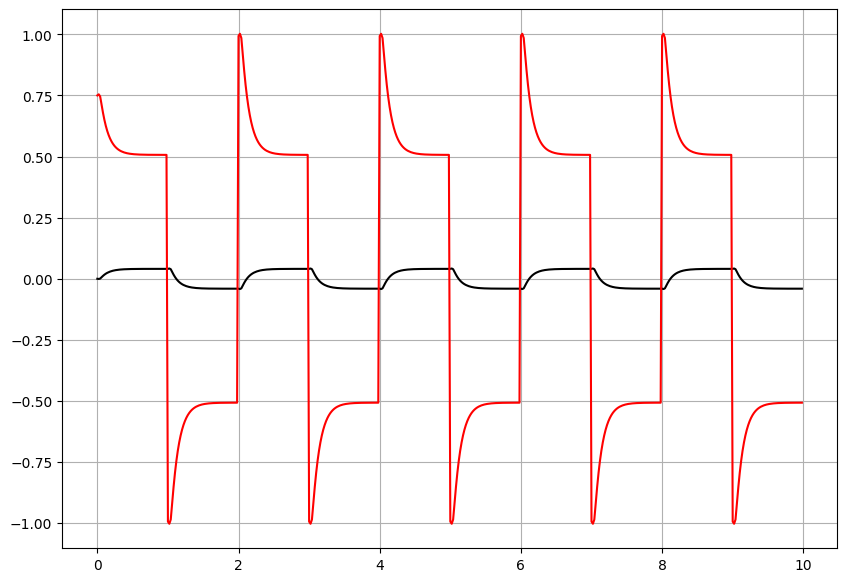

In [8]:

# Simulação para obter o Sinal de Controle 

_, sinal_controle = ct.forced_response(C, T = tempo, U = sinal_de_entrada)

# Simulação do Sistema em Malha Fechada para Onda Quadrada 

plt.figure(figsize=(10,7))
plt.plot(tempo, y_malha_fechada, '-k')
#plt.plot(tempo, y_malha_aberta, '-b')
plt.plot(tempo, sinal_controle, '-r', label= "Sinal de Controle")
plt.grid()
plt.show()



In [9]:
ct.damp(H)
#ct.zeros(H)
ct.step_info(H)


_____Eigenvalue______ Damping___ Frequency_
    0.8262                     1    -0.8262
    0.3281                     1    -0.3281
   -0.2029                     1     0.2029


{'RiseTime': 0.24,
 'SettlingTime': 0.46,
 'SettlingMin': 0.29582156954807765,
 'SettlingMax': 0.32428392460566047,
 'Overshoot': 0,
 'Undershoot': 1.8400542078229938,
 'Peak': 0.3242839246056603,
 'PeakTime': 3.72,
 'SteadyStateValue': 0.32428392460566047}

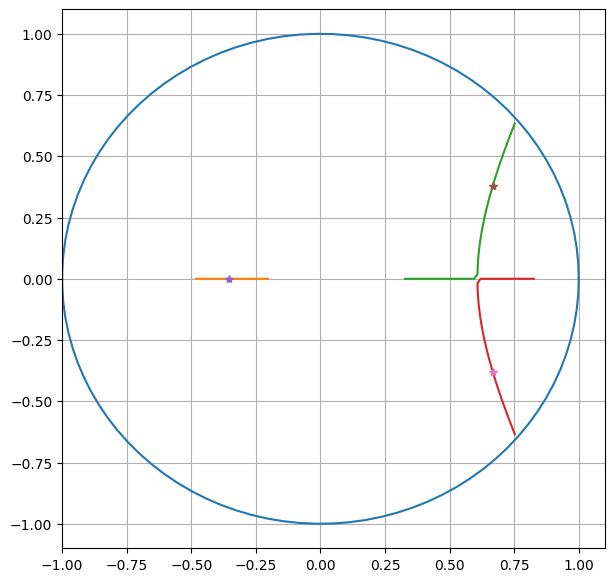

In [10]:
kvect = np.arange(0,12,0.01)
rlist,_ = ct.rlocus(H, kvect=kvect, plot = False)

teta = np.linspace(0,2*np.pi,100)
K = 4.5
plt.figure(figsize=(7,7))
plt.plot(np.cos(teta),np.sin(teta))
plt.plot(np.real(rlist[:]),np.imag(rlist[:]))
plt.plot(np.real(rlist[kvect==K]),np.imag(rlist[kvect==K]), '*')
plt.axis([-1,1.1,-1.1,1.1])
plt.grid()
plt.show()

# Controle PI

In [11]:
Kpi = 1.35
a = 7.68
Gzc = ct.tf([Kpi,Kpi*a],[1,0])
print(Gzc)

Gzd = ct.c2d(Gzc,Ts,'tustin')
print(Gzd)



1.35 s + 10.37
--------------
      s


1.454 z - 1.246
---------------
     z - 1

dt = 0.02



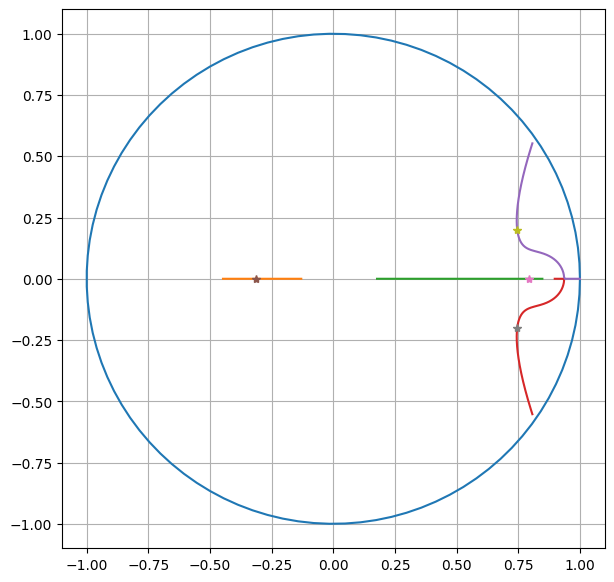

In [12]:
kvect = np.arange(0,12,0.01)
rlist,_ = ct.rlocus(Gzd*Gz, kvect=kvect, plot = False)

teta = np.linspace(0,2*np.pi,100)
plt.figure(figsize=(7,7))
plt.plot(np.cos(teta),np.sin(teta))
plt.plot(np.real(rlist[:]),np.imag(rlist[:]))
plt.plot(np.real(rlist[kvect==K]),np.imag(rlist[kvect==K]), '*')
# plt.axis([-1,1.1,-1.1,1.1])
plt.grid()
plt.show()

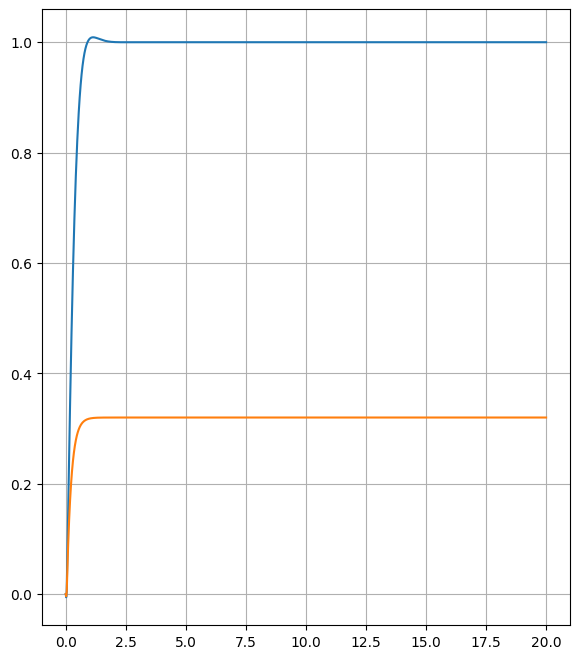

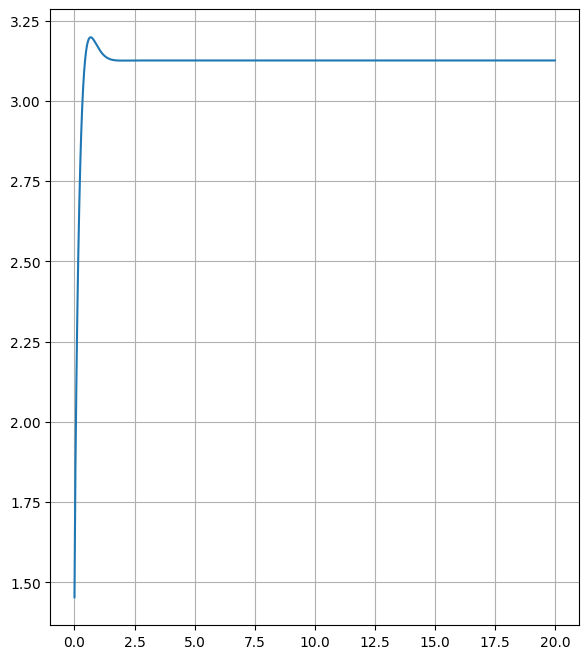

In [13]:

H2 = ct.feedback(Gzd*Gz , 1, sign=-1)
C = ct.feedback(Gzd, Gz, sign=-1)

T, yG = ct.step_response(Gz,T=20)
T, yH = ct.step_response(H2,T=20)
T, yC = ct.step_response(C,T=20)

plt.figure(figsize=(15,8))
plt.subplot(121)
plt.plot(T,yH)
plt.plot(T,yG)
plt.grid()
plt.show()
plt.figure(figsize=(15,8))
plt.subplot(122)
plt.plot(T,yC)
plt.grid()
plt.show()

In [14]:
ct.damp(H2)
ct.step_info(H2)

_____Eigenvalue______ Damping___ Frequency_
    0.9254   +0.0438j     0.8502      4.491
    0.9254   -0.0438j     0.8502      4.491
    0.2947                     1    -0.2947
   -0.1945                     1     0.1945


{'RiseTime': 0.5,
 'SettlingTime': 0.78,
 'SettlingMin': 0.9116585555581449,
 'SettlingMax': 1.0089446214756217,
 'Overshoot': 0.8944621475618334,
 'Undershoot': 0.5782739039999981,
 'Peak': 1.0089446214756217,
 'PeakTime': 1.1400000000000001,
 'SteadyStateValue': 1.0000000000000033}

In [15]:
ct.zeros(H2)

array([ 4.23845096+0.j, -1.35760632+0.j,  0.85735513+0.j])

{'RiseTime': 0.5, 'SettlingTime': 0.78, 'SettlingMin': 0.9116585555581449, 'SettlingMax': 1.0089446214756217, 'Overshoot': 0.8944621475618334, 'Undershoot': 0.5782739039999981, 'Peak': 1.0089446214756217, 'PeakTime': 1.1400000000000001, 'SteadyStateValue': 1.0000000000000033}


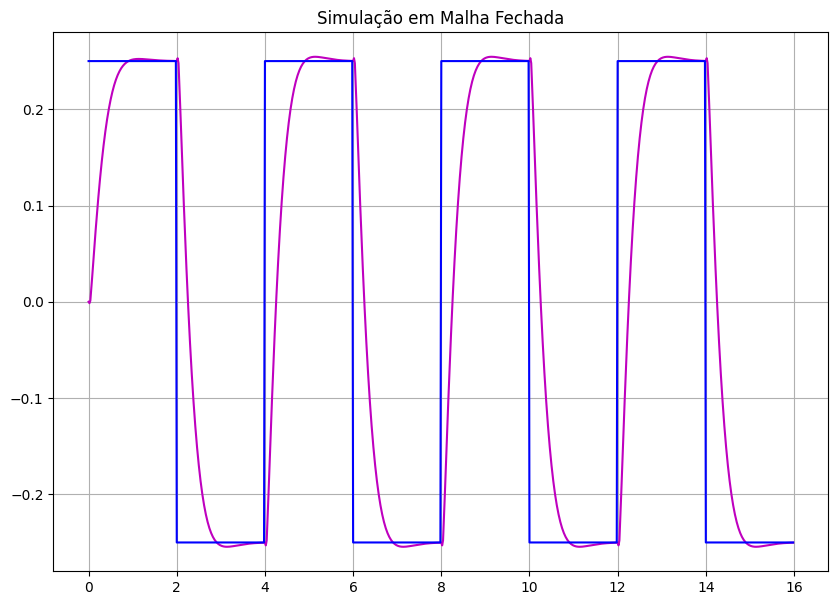

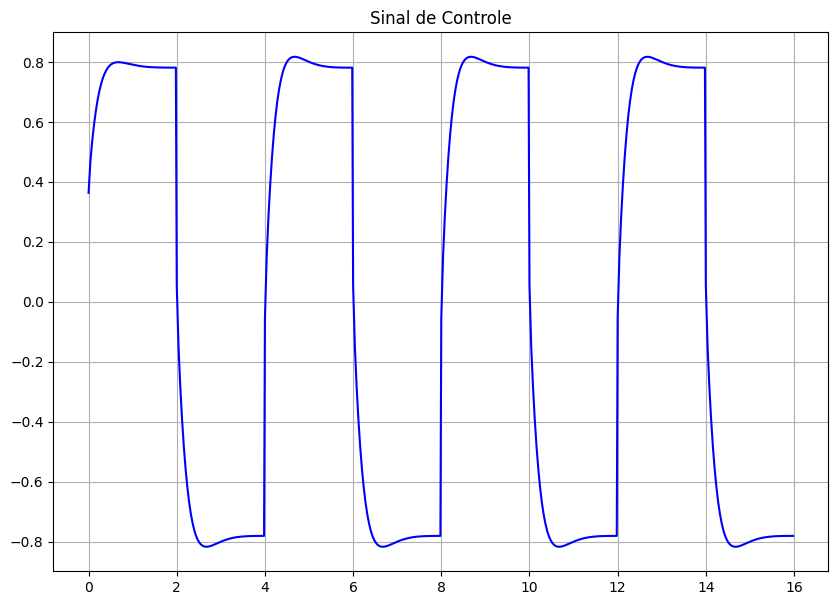

In [16]:

N = 800
Amplutude = 1
freq = 0.25
Fs = 50
Ts =1/Fs

n = np.arange(0,N)
tempo = n*Ts

sinal_de_entrada = Amplutude*square(2*np.pi*freq*n*Ts)

sinal_de_referencia = 0.25*Amplutude*square(2*np.pi*freq*n*Ts)

_,ymf_pi = ct.forced_response(H2, T = tempo, U = sinal_de_referencia)
_,u_pi = ct.forced_response(C,T = tempo, U = sinal_de_referencia)

print(ct.step_info(H2))

plt.figure(figsize=(10,7))
# plt.plot(tempo,ym,'k' ,tempo,y,'r')
plt.plot(tempo,ymf_pi,'m')
plt.plot(tempo,sinal_de_referencia,'b')
plt.title("Simulação em Malha Fechada")
plt.grid()
plt.show()

plt.figure(figsize=(10,7))
plt.plot(tempo,u_pi,'b')
plt.title("Sinal de Controle")
plt.grid()
plt.show()